In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%matplotlib inline
plt.rcParams['text.latex.preamble'] = [r'\usepackage{newtxmath}'] 
plt.rcParams['text.usetex'] = True
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times"
plt.rc('text', usetex=True)

/var/folders/yg/djxj05p562nc92kcrz6sfj3c0000gn/T/ipykernel_47146/3356598534.py:2: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  plt.rcParams['text.latex.preamble'] = [r'\usepackage{newtxmath}']


## Setup

In [4]:
x_simplex = np.array([0, .5, 1, 0])
y_simplex = np.array([0, np.sqrt(3) / 2, 0, 0])

In [5]:
num = 50
X, Y = np.meshgrid(1.2*np.linspace(-.5, .5, num=num) + .5, 1.2*np.linspace(-.5, .5, num=num) + np.sqrt(3) / 4)
x = np.vstack((X.flatten(), Y.flatten())).T
z_1 = np.sqrt((x ** 2).sum(axis=1)).reshape(num, num)
z_2 = np.sqrt(((x - np.array([1, 0])) ** 2).sum(axis=1)).reshape(num, num)
z_3 = np.sqrt(((x - np.array([.5, np.sqrt(3) / 2])) ** 2).sum(axis=1)).reshape(num, num)
h = np.array([.5, np.sqrt(3) / 6])
h_1 = np.array([.75, np.sqrt(3) / 4])
h_2 = np.array([.25, np.sqrt(3) / 4])
h_3 = np.array([.5, 0])

In [24]:
p = [1, 0, 0]
p = [.45, 35, .2]
p = [.45, .4, .15]
# p = [.35, .325, .325]
Z = p[0] * z_1 + p[1] * z_2 + p[2] * z_3
i_star = np.argmin(Z)
ind = (i_star//num, i_star%num)
eta_x = p[1] + p[2] * .5
eta_y = p[2] * np.sqrt(3) / 2

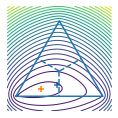

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(1.8, 1.75))
# fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.set_aspect('equal')
ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])
a = ax.contour(X, Y, Z, levels=30, linewidths=1)
b, = ax.plot(x_simplex, y_simplex, c='C0')
c, = ax.plot([h[0], h_1[0]], [h[1], h_1[1]], c='C0', linestyle='--')
ax.plot([h[0], h_2[0]], [h[1], h_2[1]], c='C0', linestyle='--')
ax.plot([h[0], h_3[0]], [h[1], h_3[1]], c='C0', linestyle='--')
d = ax.scatter(X[ind], Y[ind], marker='+', c='C1')
e = ax.scatter(eta_x, eta_y, marker='+', c='C0')
# ax.legend([b, c, e, d], ['simplex', 'decision frontier', r'$\eta$', r'$z^*$'], prop={'size': 10})
# ax.clabel(a, inline=True, inline_spacing=1, fontsize=6)
fig.tight_layout()
# fig.savefig('simplexleg.pdf')

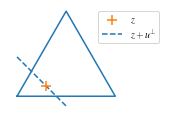

In [69]:
fig, ax = plt.subplots(1, 1, figsize=(2.5, 1.75))
ax.set_aspect('equal')
ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(-.1, 1.5)
b, = ax.plot(x_simplex, y_simplex, c='C0')
e, = ax.plot([0, .5], [.4, -.1], linestyle='--', c='C0', zorder=5)
d = ax.scatter([.3], [.1], marker='+', c='C1', s=100, zorder=10)
ax.legend([d, e], [r'$z$', r'$z + u^\perp$'])
fig.tight_layout()